# CH. 8 - Market Basket Analysis
## Activities

#### Activity 8.01: Load and Prep Full Online Retail Data

In [0]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

In [0]:
online = pandas.read_excel(
    io="./Online Retail.xlsx", 
    sheet_name="Online Retail", 
    header=0
)

In [0]:
online['IsCPresent'] = (
    online['InvoiceNo']
    .astype(str)
    .apply(lambda x: 1 if x.find('C') != -1 else 0)
)

In [0]:
online1 = (
    online
    .loc[online["Quantity"] > 0]
    .loc[online['IsCPresent'] != 1]
    .loc[:, ["InvoiceNo", "Description"]]
    .dropna()
)

In [0]:
invoice_item_list = []
for num in list(set(online1.InvoiceNo.tolist())):
    tmp_df = online1.loc[online1['InvoiceNo'] == num]
    tmp_items = tmp_df.Description.tolist()
    invoice_item_list.append(tmp_items)

In [0]:
online_encoder = mlxtend.preprocessing.TransactionEncoder()
online_encoder_array = online_encoder.fit_transform(invoice_item_list)

In [0]:
online_encoder_df = pandas.DataFrame(
    online_encoder_array, 
    columns=online_encoder.columns_
)

In [12]:
## COL in different order
online_encoder_df.loc[
    20125:20135, 
    online_encoder_df.columns.tolist()[100:110]
]

,6 CHOCOLATE LOVE HEART T-LIGHTS,6 EGG HOUSE PAINTED WOOD,6 GIFT TAGS 50'S CHRISTMAS,6 GIFT TAGS VINTAGE CHRISTMAS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,6 RIBBONS SHIMMERING PINKS,6 ROCKET BALLOONS,60 CAKE CASES DOLLY GIRL DESIGN
20125,False,False,False,False,False,False,False,False,False,False
20126,False,False,False,False,False,False,False,False,False,False
20127,False,False,False,False,False,False,False,False,False,False
20128,False,False,False,False,False,False,False,False,False,False
20129,False,False,False,False,False,False,False,False,False,False
20130,False,False,False,False,False,False,False,False,False,False
20131,False,False,False,False,False,False,False,False,False,False
20132,False,False,False,False,False,False,False,False,False,False
20133,False,False,False,False,False,False,False,False,False,False
20134,False,False,False,False,False,False,False,False,False,False


#### Activity 8.02: Apriori on the Complete Online Retail Data Set

In [13]:
mod_colnames_minsupport = mlxtend.frequent_patterns.apriori(
    online_encoder_df, 
    min_support=0.01,
    use_colnames=True
)
mod_colnames_minsupport.loc[0:6]

,support,itemsets
0,0.013359,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.015793,(10 COLOUR SPACEBOY PEN)
2,0.012465,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.017630,(12 PENCIL SMALL TUBE WOODLAND)
4,0.017978,(12 PENCILS SMALL TUBE RED RETROSPOT)
5,0.017630,(12 PENCILS SMALL TUBE SKULL)
6,0.013309,(12 PENCILS TALL TUBE RED RETROSPOT)


In [14]:
mod_colnames_minsupport[
    mod_colnames_minsupport['itemsets'] == frozenset(
        {'10 COLOUR SPACEBOY PEN'}
    )
]

,support,itemsets
1,0.015793,(10 COLOUR SPACEBOY PEN)


In [0]:
mod_colnames_minsupport['length'] = (
    mod_colnames_minsupport['itemsets'].apply(lambda x: len(x))
)

In [16]:
## item set order different

mod_colnames_minsupport[
    (mod_colnames_minsupport['length'] == 2) & 
    (mod_colnames_minsupport['support'] >= 0.02) &
    (mod_colnames_minsupport['support'] < 0.021)
]

,support,itemsets,length
836,0.020759,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...",2
887,0.020362,"(CHARLOTTE BAG SUKI DESIGN, CHARLOTTE BAG PINK...",2
923,0.020610,"(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",2
1105,0.020560,"(JUMBO BAG PINK POLKADOT, JUMBO BAG BAROQUE B...",2
1114,0.020908,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG...",2
1116,0.020957,"(JUMBO BAG BAROQUE BLACK WHITE, JUMBO STORAGE...",2
1129,0.020560,"(JUMBO BAG ALPHABET, JUMBO BAG RED RETROSPOT)",2
1137,0.020163,"(JUMBO BAG APPLES, JUMBO BAG PEARS)",2
1203,0.020709,"(JUMBO BAG PINK VINTAGE PAISLEY, JUMBO SHOPPER...",2
1218,0.020560,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SK...",2


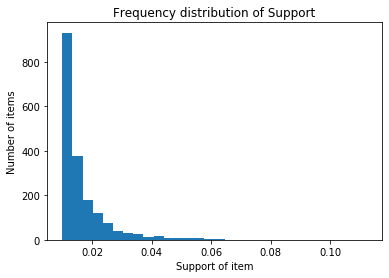

In [17]:
mod_colnames_minsupport.hist("support", grid=False, bins=30)
plt.xlabel("Support of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Support")
plt.show() 

#### Activity 8.03: Find the Association Rules on the Complete Online Retail Data Set

In [18]:
rules = mlxtend.frequent_patterns.association_rules(
    mod_colnames_minsupport, 
    metric="confidence",
    min_threshold=0.6, 
    support_only=False
)

rules.loc[0:6]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021255,0.048669,0.013756,0.647196,13.297902,0.012722,2.696488
1,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.021255,0.052195,0.014501,0.682243,13.071023,0.013392,2.982798
2,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE GREEN),0.022100,0.048669,0.013558,0.613483,12.605201,0.012482,2.461292
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.048669,0.052195,0.031784,0.653061,12.511932,0.029244,2.731908
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.052195,0.048669,0.031784,0.608944,12.511932,0.029244,2.432722
5,(ALARM CLOCK BAKELIKE IVORY),(ALARM CLOCK BAKELIKE RED ),0.028308,0.052195,0.018524,0.654386,12.537313,0.017047,2.742380
6,(ALARM CLOCK BAKELIKE ORANGE),(ALARM CLOCK BAKELIKE RED ),0.022100,0.052195,0.014998,0.678652,13.002217,0.013845,2.949463


In [19]:
print("Number of Associations: {}".format(rules.shape[0]))

Number of Associations: 498


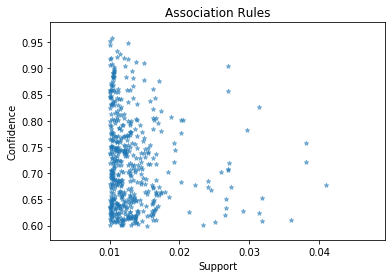

In [20]:
rules.plot.scatter("support", "confidence", alpha=0.5, marker="*")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Association Rules")
plt.show()

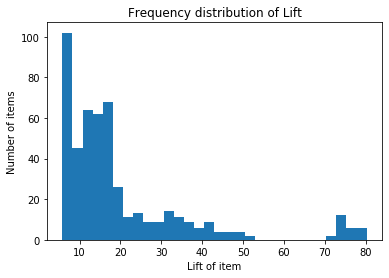

In [21]:
rules.hist("lift", grid=False, bins=30)
plt.xlabel("Lift of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Lift")
plt.show() 

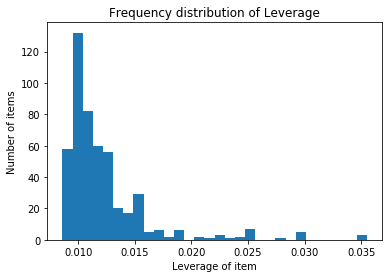

In [22]:
rules.hist("leverage", grid=False, bins=30)
plt.xlabel("Leverage of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Leverage")
plt.show() 

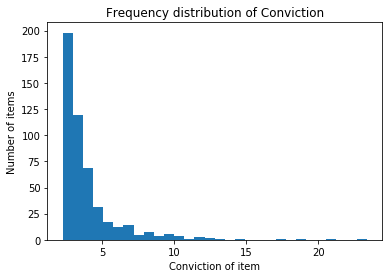

In [23]:
plt.hist(rules[numpy.isfinite(rules['conviction'])].conviction.values, bins = 30)
plt.xlabel("Conviction of item")
plt.ylabel("Number of items")
plt.title("Frequency distribution of Conviction")
plt.show() 